In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2023-01-01'
stock = 'GOOG'
data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,89.589981,89.809998,90.099998,87.620003,87.620003,17815000
2022-12-27 00:00:00+00:00,87.714592,87.930000,89.500000,87.535004,89.309998,15470900


In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2763,2022-12-23 00:00:00+00:00,89.589981,89.809998,90.099998,87.620003,87.620003,17815000
2764,2022-12-27 00:00:00+00:00,87.714592,87.930000,89.500000,87.535004,89.309998,15470900
2765,2022-12-28 00:00:00+00:00,86.248192,86.459999,88.519997,86.370003,87.500000,17879600


In [ ]:
ma_100_days= data.Close.rolling(100).mean()
ma_100_days

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,101.9020
2764,101.5926
2765,101.2750
2766,100.9831


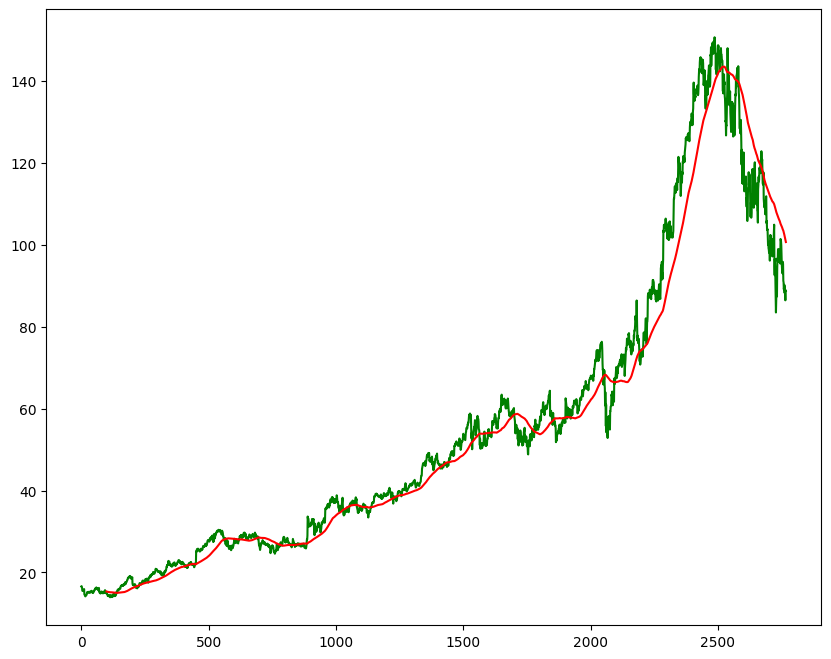

In [ ]:
 plt.figure(figsize=(10,8))
plt.plot(data['Close'],'g')
plt.plot(ma_100_days, 'r')

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

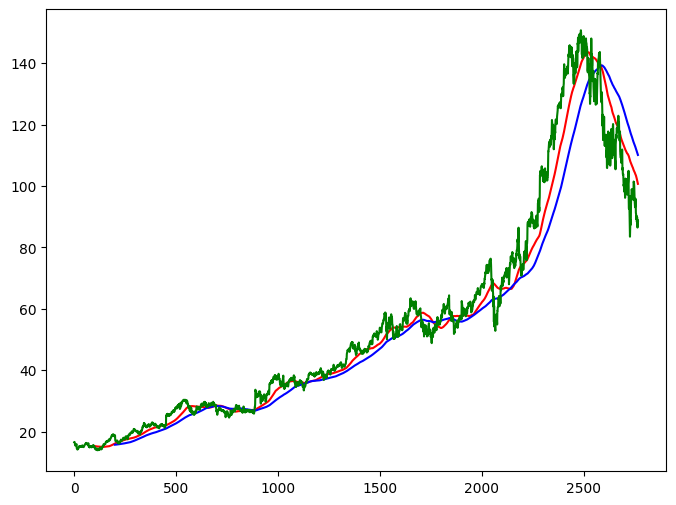

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])
data_train.shape[0]


2214

In [ ]:
data_test.shape[0]

554

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - loss: 0.0738
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - loss: 0.0072
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - loss: 0.0064
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - loss: 0.0065
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - loss: 0.0055
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - loss: 0.0051
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - loss: 0.0056
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - loss: 0.0058
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - loss: 0.0046
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - loss: 0.0040
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.0046
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0044
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - loss: 0.0039
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - loss: 0.0035
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


In [ ]:
scale =1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

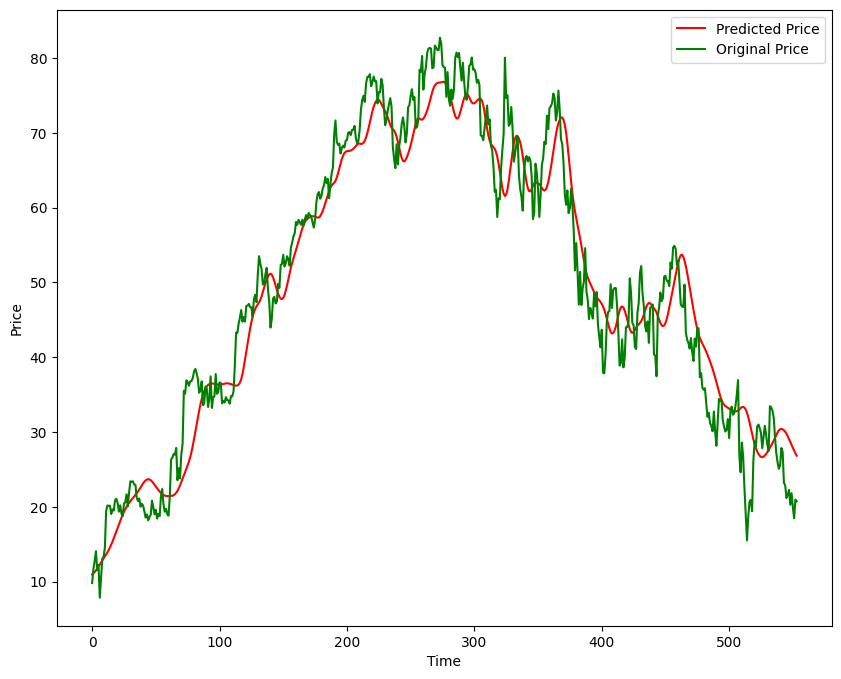

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
# Random Forest for Stock Price Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load and preprocess the data (same as original preprocessing)
X = data[['Open', 'High', 'Low', 'Volume']].values  # Use other features than just 'Close'
y = data['Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

# Plot results
#plt.figure(figsize=(10,8))
#plt.plot(y_pred_rf, 'r', label='Predicted Price')
#plt.plot(y_test, 'g', label='Original Price')
#plt.xlabel('Time')
#plt.ylabel('Price')
#plt.legend()
#plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 0.3927575477128901


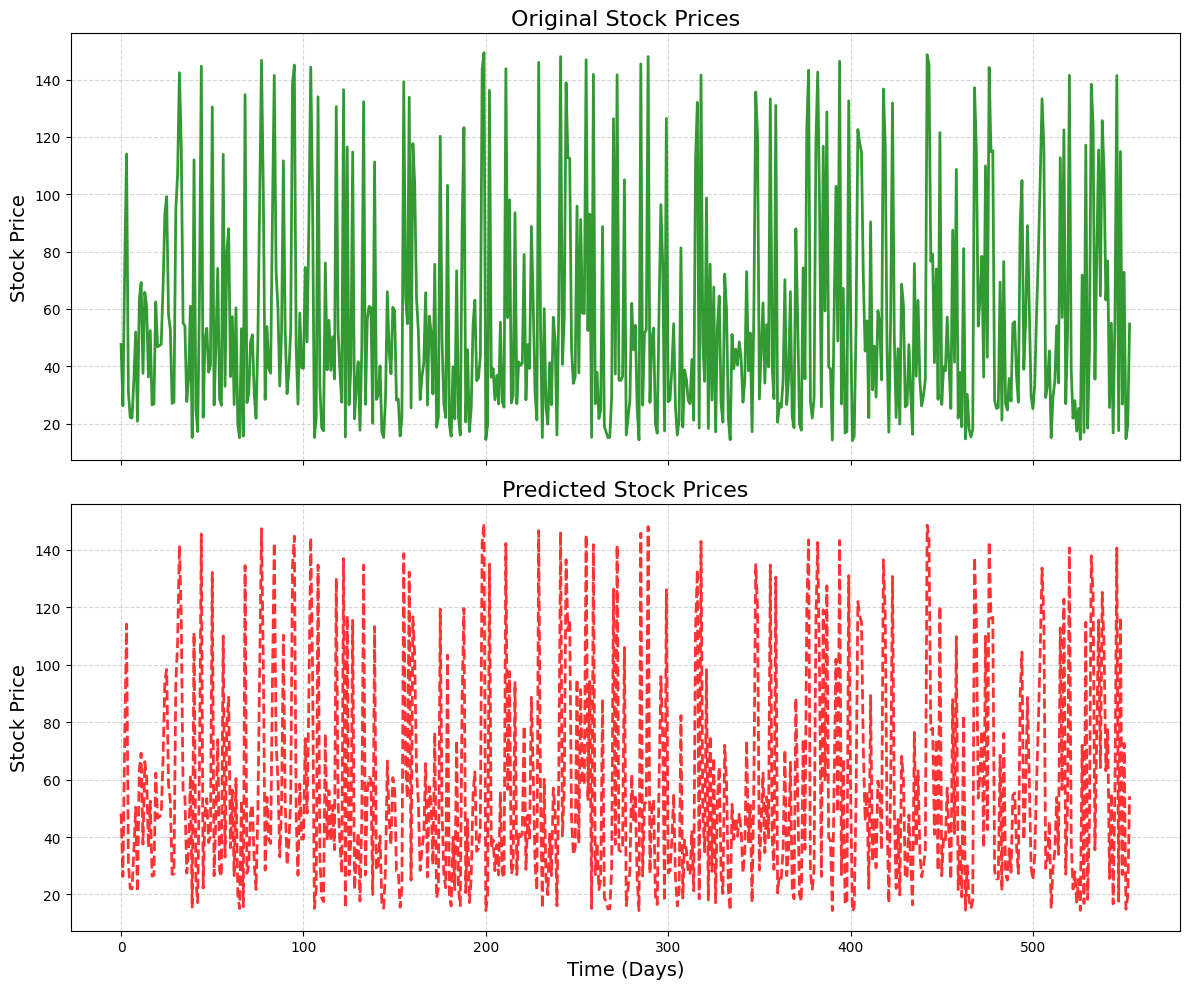

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot actual prices
axs[0].plot(y_test, 'g-', label='Original Price', alpha=0.8, linewidth=2)
axs[0].set_title('Original Stock Prices', fontsize=16)
axs[0].set_ylabel('Stock Price', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Plot predicted prices
axs[1].plot(y_pred_rf, 'r--', label='Predicted Price', alpha=0.8, linewidth=2)
axs[1].set_title('Predicted Stock Prices', fontsize=16)
axs[1].set_xlabel('Time (Days)', fontsize=14)
axs[1].set_ylabel('Stock Price', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout and show
plt.tight_layout()
plt.show()


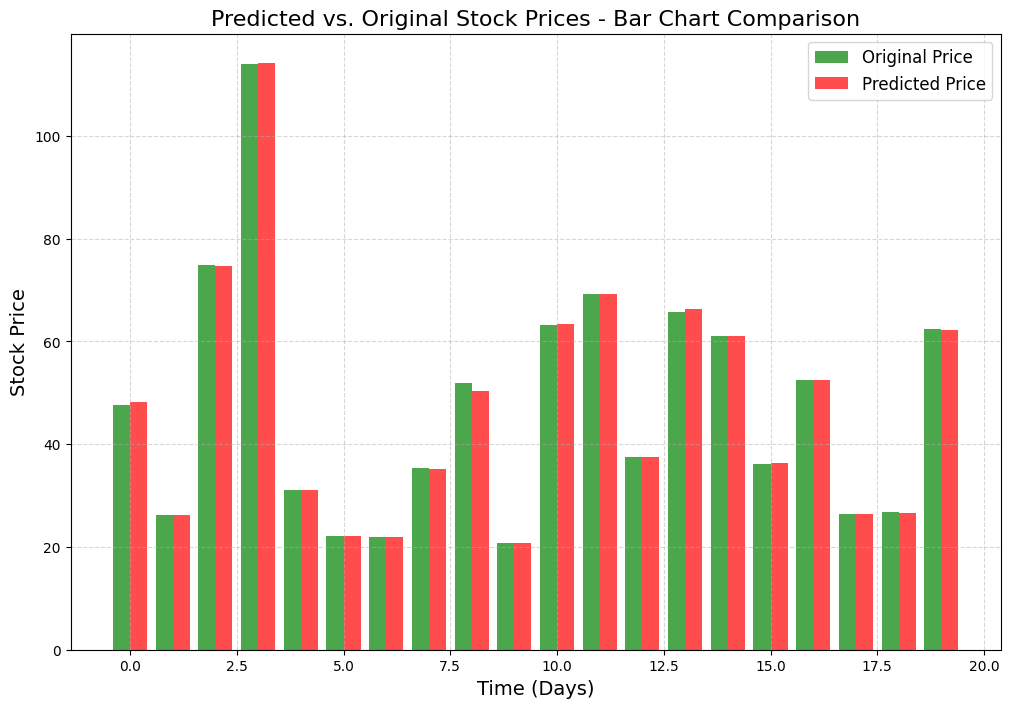

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure `y_test` and `y_pred_rf` are numpy arrays and 1-dimensional
y_test = np.array(y_test).flatten()
y_pred_rf = np.array(y_pred_rf).flatten()

# Set `num_points` dynamically to avoid index issues
num_points = min(20, len(y_test), len(y_pred_rf))
indices = np.arange(num_points)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(indices - 0.2, y_test[:num_points], width=0.4, label='Original Price', color='green', alpha=0.7)
plt.bar(indices + 0.2, y_pred_rf[:num_points], width=0.4, label='Predicted Price', color='red', alpha=0.7)

plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Predicted vs. Original Stock Prices - Bar Chart Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


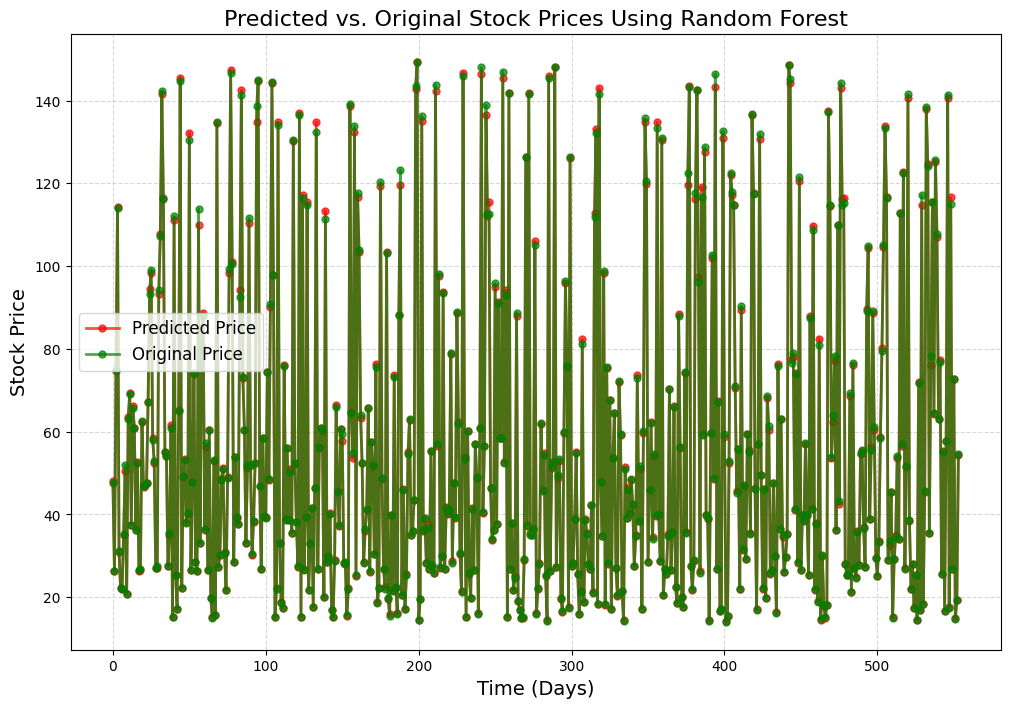

In [ ]:
# Improved plot
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Plot predicted and original prices
plt.plot(y_pred_rf, 'r-o', label='Predicted Price', alpha=0.7, linewidth=2, markersize=5)  # Red line with markers for predicted prices
plt.plot(y_test, 'g-o', label='Original Price', alpha=0.7, linewidth=2, markersize=5)  # Green line with markers for original prices

# Add gridlines to help with visibility
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels with larger font sizes
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)

# Add title to the plot
plt.title('Predicted vs. Original Stock Prices Using Random Forest', fontsize=16)

# Display legend with larger font size
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [ ]:
# After training the Random Forest model
print(f"Number of trees in the forest: {len(rf_model.estimators_)}")
print(f"Feature Importances: {rf_model.feature_importances_}")

Number of trees in the forest: 100
Feature Importances: [1.08202958e-01 3.26689035e-01 5.65074403e-01 3.36043017e-05]


In [ ]:
# Support Vector Machine for Stock Price Prediction
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load and preprocess the data (same as original preprocessing)
X = data[['Open', 'High', 'Low', 'Volume']].values  # Use other features than just 'Close'
y = data['Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model (using Radial Basis Function kernel)
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Calculate MSE
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm}")

# Plot results
#plt.figure(figsize=(10,8))
#plt.plot(y_pred_svm, 'r', label='Predicted Price')
#plt.plot(y_test, 'g', label='Original Price')
#plt.xlabel('Time')
#plt.ylabel('Price')
#plt.legend()
#plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM MSE: 1407.7233726450984


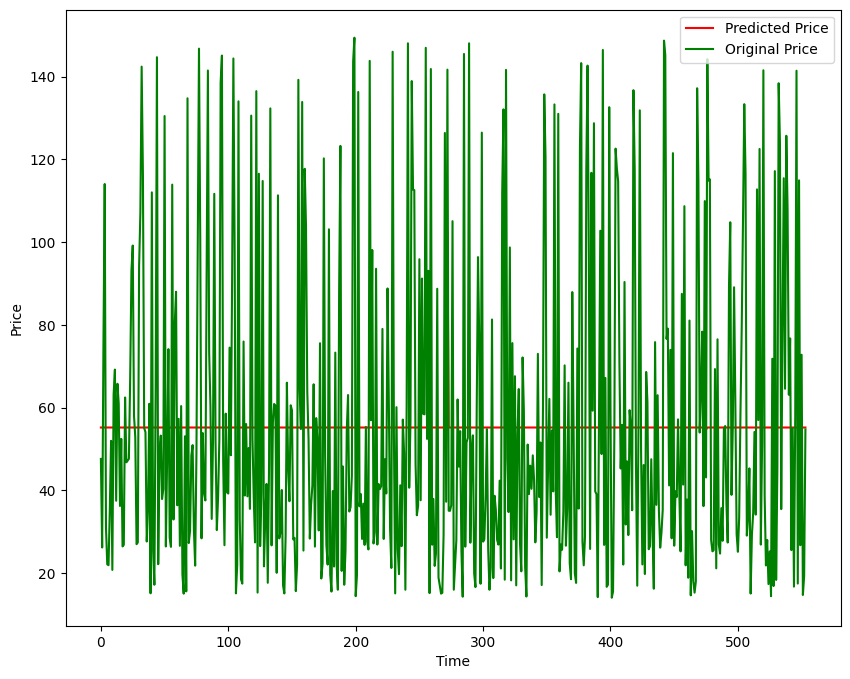

In [ ]:
# Plot results
plt.figure(figsize=(10,8))
plt.plot(y_pred_svm, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

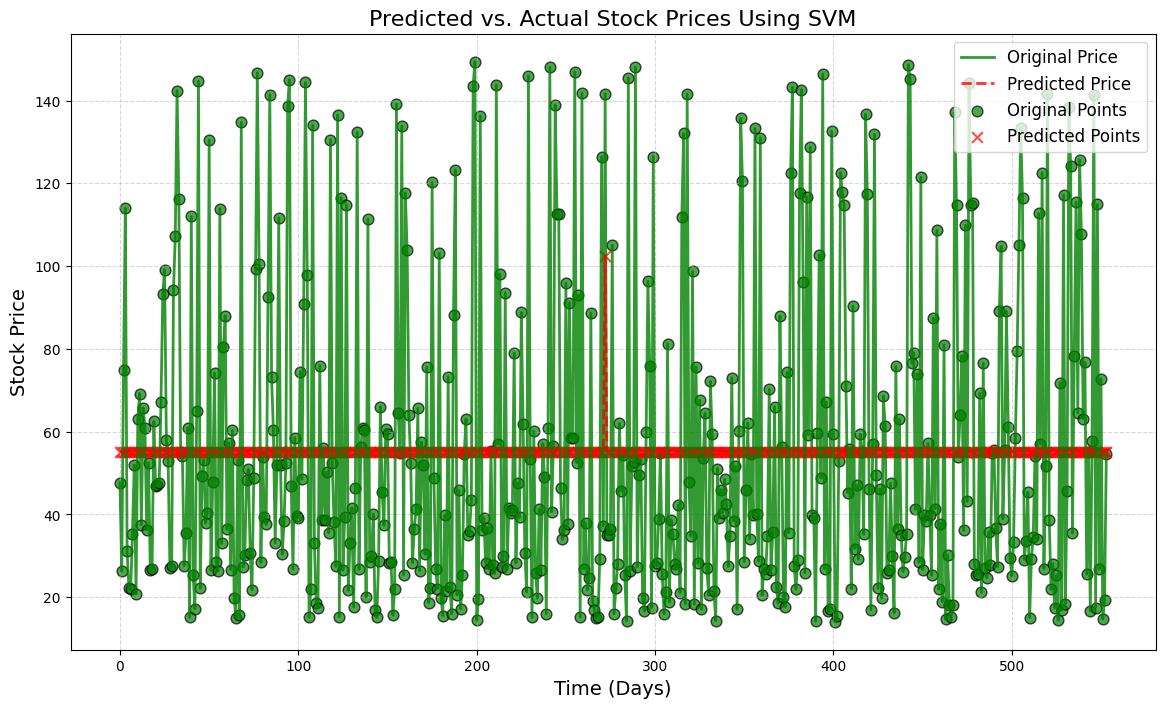

In [ ]:
plt.figure(figsize=(14, 8))  # Bigger plot size for better visibility

# Plot predicted and actual prices with distinct styles
plt.plot(y_test, 'g-', label='Original Price', alpha=0.8, linewidth=2)  # Solid green line for actual prices
plt.plot(y_pred_svm, 'r--', label='Predicted Price', alpha=0.8, linewidth=2)  # Dashed red line for predicted prices

# Adding scatter points for each data point
plt.scatter(range(len(y_test)), y_test, color='green', marker='o', s=60, label="Original Points", edgecolor='black', alpha=0.7)
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='red', marker='x', s=60, label="Predicted Points", alpha=0.7)

# Adding gridlines for easier interpretation
plt.grid(True, linestyle='--', alpha=0.5)

# Adding labels and title
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Predicted vs. Actual Stock Prices Using SVM', fontsize=16)

# Displaying the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


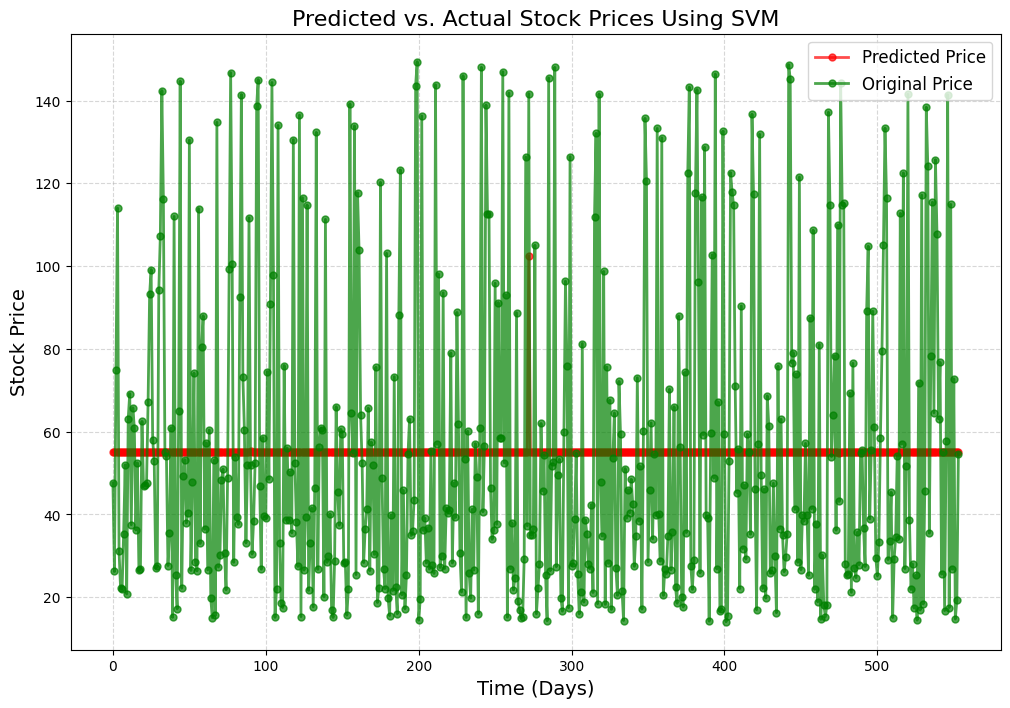

In [ ]:
# Improved plot for SVM predictions
plt.figure(figsize=(12, 8))  # Bigger plot size for better visibility

# Plot predicted and actual prices with markers
plt.plot(y_pred_svm, 'r-o', label='Predicted Price', alpha=0.7, linewidth=2, markersize=5)  # Red line with circles
plt.plot(y_test, 'g-o', label='Original Price', alpha=0.7, linewidth=2, markersize=5)  # Green line with circles

# Adding gridlines for easier interpretation
plt.grid(True, linestyle='--', alpha=0.5)

# Adding labels and title
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Predicted vs. Actual Stock Prices Using SVM', fontsize=16)

# Displaying the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [ ]:
# After training the SVM model
print(f"Number of Support Vectors: {svm_model.n_support_}")
print(f"Support Vectors: \n{svm_model.support_vectors_}")

# Inspect model coefficients (if using linear kernel, not RBF)
# print(f"Model Coefficients: {svm_model.coef_}")


Number of Support Vectors: [2202]
Support Vectors: 
[[7.14244995e+01 7.18499985e+01 6.93010025e+01 3.89280000e+07]
 [1.03940002e+02 1.04220001e+02 1.00650002e+02 2.16105000e+07]
 [8.78815002e+01 8.90520020e+01 8.72275009e+01 2.99980000e+07]
 ...
 [3.42734985e+01 3.46160011e+01 3.41824989e+01 3.19540000e+07]
 [4.13865013e+01 4.14500008e+01 4.12099991e+01 2.78440000e+07]
 [2.68174992e+01 2.68600006e+01 2.66259995e+01 2.77640000e+07]]


Linear Regression MSE: 0.2119014425902988


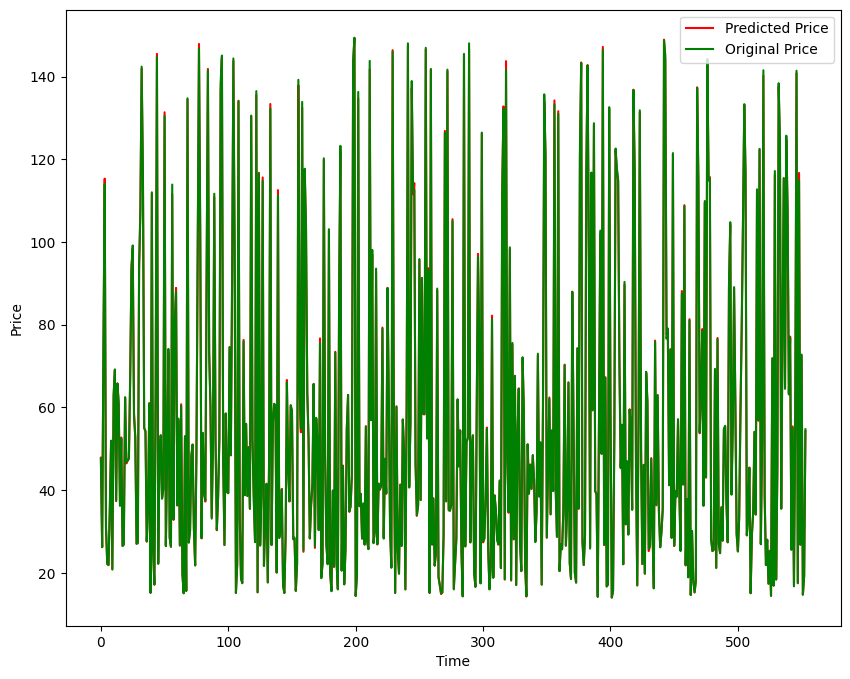

In [ ]:
# Linear Regression for Stock Price Prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and preprocess the data (same as original preprocessing)
X = data[['Open', 'High', 'Low', 'Volume']].values  # Use other features than just 'Close'
y = data['Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

# Plot results
plt.figure(figsize=(10,8))
plt.plot(y_pred_lr, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


y_test shape: (554,)
y_pred_lr shape: (554,)


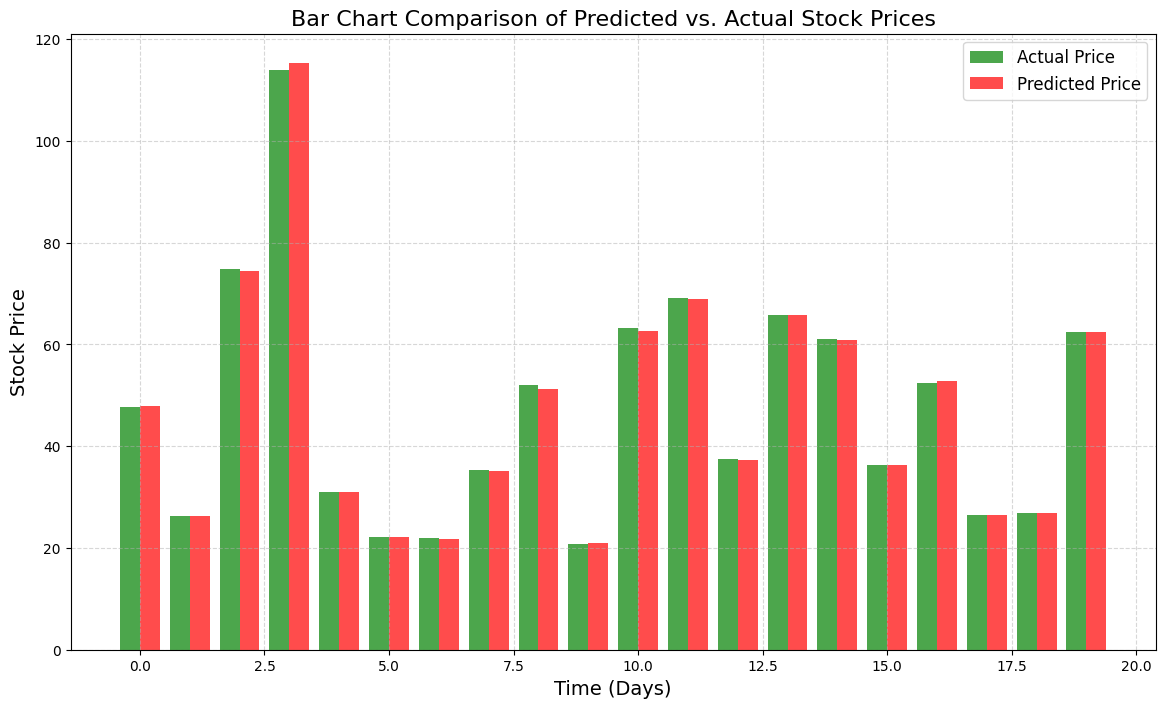

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test and y_pred_lr are numpy arrays
y_test = np.array(y_test)
y_pred_lr = np.array(y_pred_lr)

# Flatten y_pred_lr to make it 1D
y_pred_lr = y_pred_lr.flatten()  # Now y_pred_lr will have shape (554,)

# Number of points to display (for bar chart visibility)
num_points = 20
indices = np.arange(num_points)

# Check the shapes of y_test and y_pred_lr
print(f'y_test shape: {y_test.shape}')  # Should be (554,)
print(f'y_pred_lr shape: {y_pred_lr.shape}')  # Now should also be (554,)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(indices - 0.2, y_test[:num_points], width=0.4, color='green', label='Actual Price', alpha=0.7)
plt.bar(indices + 0.2, y_pred_lr[:num_points], width=0.4, color='red', label='Predicted Price', alpha=0.7)

plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Bar Chart Comparison of Predicted vs. Actual Stock Prices', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


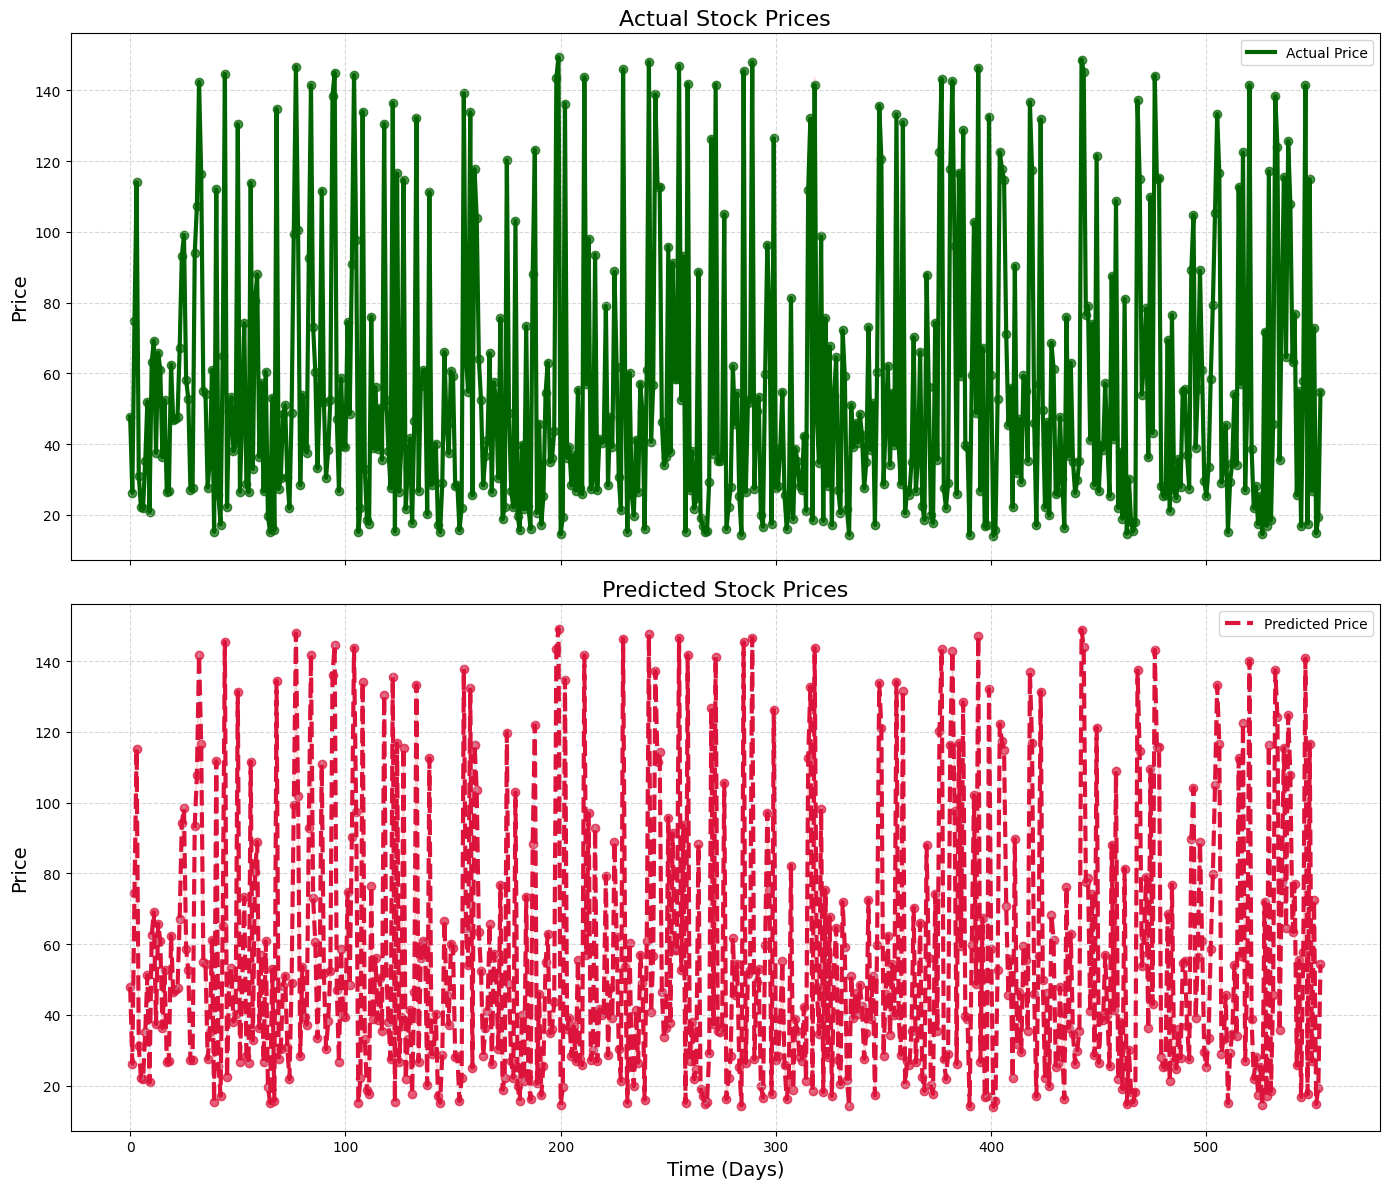

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration (replace these with your actual data)
# y_test = ... (your actual test values)
# y_pred_lr = ... (your predicted values)

# Ensure y_test and y_pred_lr are numpy arrays and are flattened
y_test = np.array(y_test)
y_pred_lr = np.array(y_pred_lr).flatten()

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot actual prices
axs[0].plot(y_test, color='darkgreen', label='Actual Price', linewidth=3)
axs[0].scatter(range(len(y_test)), y_test, color='darkgreen', alpha=0.7)
axs[0].set_title('Actual Stock Prices', fontsize=16)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend()

# Plot predicted prices
axs[1].plot(y_pred_lr, color='crimson', label='Predicted Price', linestyle='--', linewidth=3)
axs[1].scatter(range(len(y_pred_lr)), y_pred_lr, color='crimson', alpha=0.7)
axs[1].set_title('Predicted Stock Prices', fontsize=16)
axs[1].set_xlabel('Time (Days)', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend()

# Highlight the differences with a shaded area in the first subplot
axs[0].fill_between(range(len(y_test)), y_test, y_pred_lr, where=(y_test > y_pred_lr),
                     color='lightblue', alpha=0.3, label='Actual > Predicted', interpolate=True)
axs[0].fill_between(range(len(y_test)), y_test, y_pred_lr, where=(y_test <= y_pred_lr),
                     color='lightcoral', alpha=0.3, label='Predicted > Actual', interpolate=True)

# Show the difference area on the second plot too
axs[1].fill_between(range(len(y_pred_lr)), y_test, y_pred_lr, where=(y_test > y_pred_lr),
                     color='lightblue', alpha=0.3, interpolate=True)
axs[1].fill_between(range(len(y_pred_lr)), y_test, y_pred_lr, where=(y_test <= y_pred_lr),
                     color='lightcoral', alpha=0.3, interpolate=True)

plt.tight_layout()  # Adjust layout to make it more visually appealing
plt.show()


In [ ]:
# After training the Linear Regression model
print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficients: {lr_model.coef_}")


Intercept: [0.0368816]
Coefficients: [[-6.36919763e-01  7.84134757e-01  8.52793635e-01 -7.44474482e-11]]
